# QE Temperature 

Fitting a transmission (QE) curve it is possible to infer the temperature of the CCD Temperature. We use this measurement to compare with the repported RTDs temperature values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context('talk')

## Load the data

In [3]:
import pandas as pd

path = '../data/'
df = pd.read_csv(path+'run_13438_temperatures_spot_intensities.csv')
df

,sensor,Yccs,Xccs,nm1020,nm1050,nm1050/nm1020,T(C),rms_T(C)
0,R23_S10,5062.375,4080.000,9.257265e+06,2.294832e+06,0.247895,-102.547,0.39325
1,R32_S01,4003.000,5139.375,9.488316e+06,2.237947e+06,0.235863,-102.298,0.37702
2,R24_S02,7706.125,3551.875,8.987720e+06,2.291306e+06,0.254937,-102.805,0.38184
3,R43_S12,6118.625,7255.000,1.189782e+07,3.611597e+06,0.303551,-101.169,0.07286
4,R33_S22,6118.625,6195.625,9.244865e+06,2.355755e+06,0.254818,-98.805,0.25596
...,...,...,...,...,...,...,...,...
167,R34_S10,6649.875,5667.500,9.132320e+06,2.223928e+06,0.243523,-102.820,0.39718
168,R24_S22,7706.125,4608.125,9.453758e+06,2.399973e+06,0.253864,-99.971,0.48285
169,R33_S02,6118.625,5139.375,9.391757e+06,2.383070e+06,0.253741,-100.227,0.34957
170,R32_S21,4003.000,6195.625,9.275401e+06,2.239341e+06,0.241428,-102.671,0.39806


In [4]:
e2vRaftList = ["R11", "R12", "R13", "R14", "R21", "R22", 
               "R23", "R24", "R30", "R31", "R32", "R33", "R34"]

_sensors = ["S00","S01","S02","S10","S11","S12","S20","S21","S22"]
e2vSensors = ['%s_%s'%(raft, s) for s in _sensors for raft in e2vRaftList]

In [5]:
e2vFlag = []
for sensor in df.sensor:
    e2vFlag.append(sensor in e2vSensors)
    
df['E2V'] = e2vFlag

In [210]:
df

,sensor,Yccs,Xccs,nm1020,nm1050,nm1050/nm1020,T(C),rms_T(C),E2V,SXX,RXX,frac_res,qe_temp
0,R23_S10,5062.375,4080.000,9.257265e+06,2.294832e+06,0.247895,-102.547,0.39325,True,S10,R23,-0.005887,-101.946858
1,R32_S01,4003.000,5139.375,9.488316e+06,2.237947e+06,0.235863,-102.298,0.37702,True,S01,R32,0.068067,-109.769734
2,R24_S02,7706.125,3551.875,8.987720e+06,2.291306e+06,0.254937,-102.805,0.38184,True,S02,R24,-0.053950,-97.542541
3,R43_S12,6118.625,7255.000,1.189782e+07,3.611597e+06,0.303551,-101.169,0.07286,False,S12,R43,-0.443204,-70.100296
4,R33_S22,6118.625,6195.625,9.244865e+06,2.355755e+06,0.254818,-98.805,0.25596,True,S22,R33,-0.012177,-97.616370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,R34_S10,6649.875,5667.500,9.132320e+06,2.223928e+06,0.243523,-102.820,0.39718,True,S10,R34,0.018377,-104.744924
168,R24_S22,7706.125,4608.125,9.453758e+06,2.399973e+06,0.253864,-99.971,0.48285,True,S22,R24,-0.017976,-98.205625
169,R33_S02,6118.625,5139.375,9.391757e+06,2.383070e+06,0.253741,-100.227,0.34957,True,S02,R33,-0.019786,-98.282370
170,R32_S21,4003.000,6195.625,9.275401e+06,2.239341e+06,0.241428,-102.671,0.39806,True,S21,R32,0.032349,-106.103354


In [283]:
df['SXX'] = df.sensor.apply(lambda x: x.split('_')[1])
df['RXX'] = df.sensor.apply(lambda x: x.split('_')[0])

df['Reb'] = df.sensor.apply(lambda x: x.split('_')[0]+'-'+x.split('_')[1][1])
df['RebX'] = df.sensor.apply(lambda x: x.split('_')[0]+'-'+x.split('_')[1][1])
df['RebY'] = df.sensor.apply(lambda x: x.split('_')[0]+'-'+x.split('_')[1][2])

# df

In [286]:
# df[['RebX','RebY']]

# QE Relation

The quantum-efficiency curve is sensitive to temperature variations at large wavelenghts. 

Text(0.5, 9.08333333333333, 'wavelength')

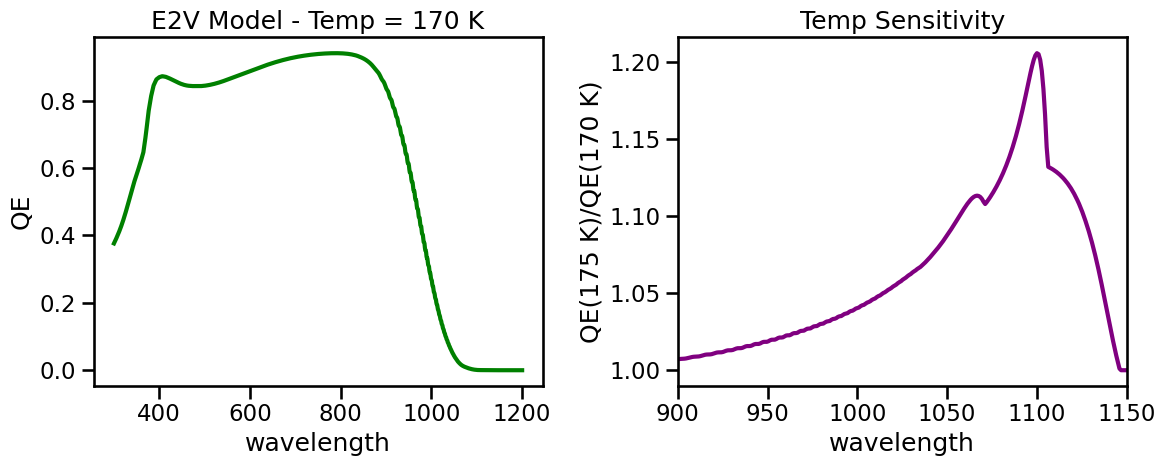

In [7]:
qe_170 = np.genfromtxt(path+'qe_e2v_curve_jul15_2023_T170.txt')
qe_175 = np.genfromtxt(path+'qe_e2v_curve_jul15_2023_T175.txt')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(qe_170[:,0], qe_170[:,1], color='g', lw=3)
plt.title('E2V Model - Temp = 170 K')
plt.ylabel('QE')
plt.xlabel('wavelength')

plt.subplot(1,2,2)
plt.plot(qe_175[:,0], qe_175[:,1]/qe_170[:,1], color='purple', lw=3)
plt.xlim(900, 1150)
plt.title('Temp Sensitivity')
plt.ylabel('QE(175 K)/QE(170 K)')
plt.tight_layout()
plt.xlabel('wavelength')

In [8]:
from scipy.interpolate import interp1d

qeCurve = interp1d(qe_170[:,0], qe_170[:,1])
qe1020 = np.round(qeCurve(1020),5)
qe1050 = np.round(qeCurve(1050),5)

print('The QE curve values with 170 K at 1020 and 1050 nm are:', qe1020, qe1050)

The QE curve values with 170 K at 1020 and 1050 nm are: 0.15087 0.0429


## Assume QE vs Temp relation

We can write the QE as a linear relation with the temperature

$$
\ln(QE) = \text{slope}\times (T-T_c) + \ln(QE_c)
$$

Assuming that the e2v sensor is a group with similar physical properties Andy derived slope for $1020nm$ and $1050nm$ of $1.058e-2/C$ and $1.694e-2/C$
More information about the modelling: 
https://confluence.slac.stanford.edu/display/LSSTCAM/Focal+Plane+Temperature+Control

### QE Ratio 

On the measurement side the log of the flux-ratio between the two wavelenghts is more robust and correlates better with temperature. 

$$
\ln{y} = \ln{\left(\frac{QE(1050nm)}{QE(1020nm)}\right)} = \ln{\left(\frac{flux(1050nm)}{flux(1020nm)}\right)}
$$

The $\ln{\left(\frac{flux(1020nm)}{flux(1050nm)}\right)}$ is basically a color term. 

The linear relation with the temperature can be arranged as:

$$
\ln(y) = (\text{slope}_{1050nm}-\text{slope}_{1020nm})\times (T-T_c) + \ln(y_c)
$$

For Andy's model values:
$$
\ln(y) = 6.36 \times 10^{-3} \times (T+103.15 ^\circ C) -1.25755
$$
At $T_c = 170 K \approx -103.15 ^\circ C $

In [9]:
print('The log(QE-Ratio) at 170 K is: ', np.round(np.log(qe1050/qe1020),5))

The log(QE-Ratio) at 170 K is:  -1.25755


In [10]:
273.15-175

98.14999999999998

In [11]:
flux_col = 'nm1050/nm1020'

flag = np.array(e2vFlag)
ix_out = np.where((df[flux_col]<0.255)& (df['T(C)']>-97.))[0]
outline_sensors = list(df['sensor'].iloc[ix_out].to_numpy())
flag[ix_out] = False
outline_sensors

['R21_S21', 'R34_S01', 'R21_S00']

In [12]:
from scipy.optimize import curve_fit

linear2 = lambda x, a, b: a*(x+103.15) + b
pars, pcov = curve_fit(linear2, df['T(C)'][flag], np.log(df[flux_col][flag]))
pars

array([ 0.00707718, -1.40240088])

In [13]:
slope_err = np.sqrt(pcov[0,0])
slope_err*1e3

1.014811100348378

In [14]:
from scipy.interpolate import interp1d

x = np.linspace(-10, -2000, 1000)
rtd = df['T(C)'].to_numpy()
flux = df[flux_col].to_numpy()

pars[0] = 6.36e-3
qe_temp = interp1d(linear2(x, *pars), x)(np.log(flux))

res = qe_temp-rtd
frac_res = res/qe_temp

In [15]:
pars_model = [6.36e-3, np.log(qe1050/qe1020)]
corr = np.mean(linear2(x, *pars_model)-linear2(x, *pars))
pars_model2 = [6.36e-3, np.log(qe1050/qe1020)-corr]
print(np.exp(corr))

1.1558709968389804


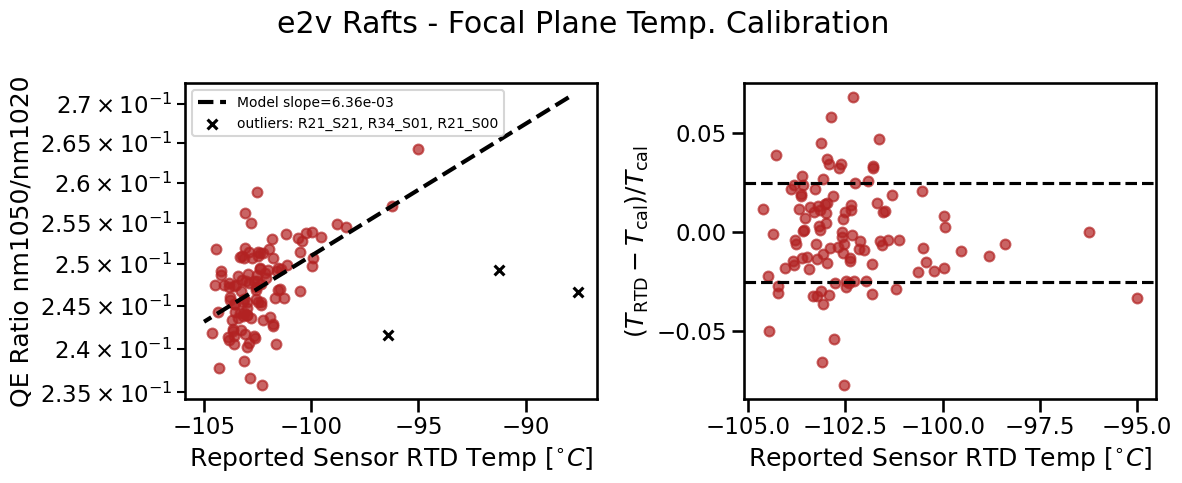

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
x = np.linspace(-88, -105, 100)
# plt.plot(x, np.exp(linear2(x, *pars)), color='k', ls='--',label='slope=%.2e'%pars[0])
plt.plot(x, np.exp(linear2(x, *pars_model2)), color='k', ls='--', label='Model slope=%.2e'%pars[0],lw=3)
plt.scatter(df['T(C)'][flag], df[flux_col][flag], color='firebrick', s=50, alpha=0.7)
plt.scatter(df['T(C)'].iloc[ix_out], df[flux_col].iloc[ix_out], color='k', marker='x', s=50, label='outliers: %s'%((', ').join(outline_sensors)))

plt.legend(fontsize=10, loc=0)
plt.yscale('log')
plt.xlabel('Reported Sensor RTD Temp [$^{\circ}C$]')
plt.ylabel('QE Ratio %s'%flux_col)

plt.subplot(1,2,2)
plt.scatter(rtd[flag], frac_res[flag], color='firebrick', s=50, alpha=0.7)
plt.axhline(-0.025, color='k', ls='--')
plt.axhline(+0.025, color='k', ls='--')
plt.ylabel(r'$(T_{\rm RTD}-T_{\rm cal})/T_{\rm cal}$')
plt.xlabel('Reported Sensor RTD Temp [$^{\circ}C$]')

plt.suptitle('e2v Rafts - Focal Plane Temp. Calibration')
plt.tight_layout()
plt.savefig('qe_ratio_rtd_temp_fit.png', dpi=150)

In [507]:
df['R'] = np.hypot(df.Yccs,df.Xccs)
df.R

0      6501.849017
1      6514.382886
2      8485.291894
3      9490.658401
4      8707.659906
          ...     
167    8737.356223
168    8978.818326
169    7990.666260
170    7376.298404
171    8286.074704
Name: R, Length: 172, dtype: float64

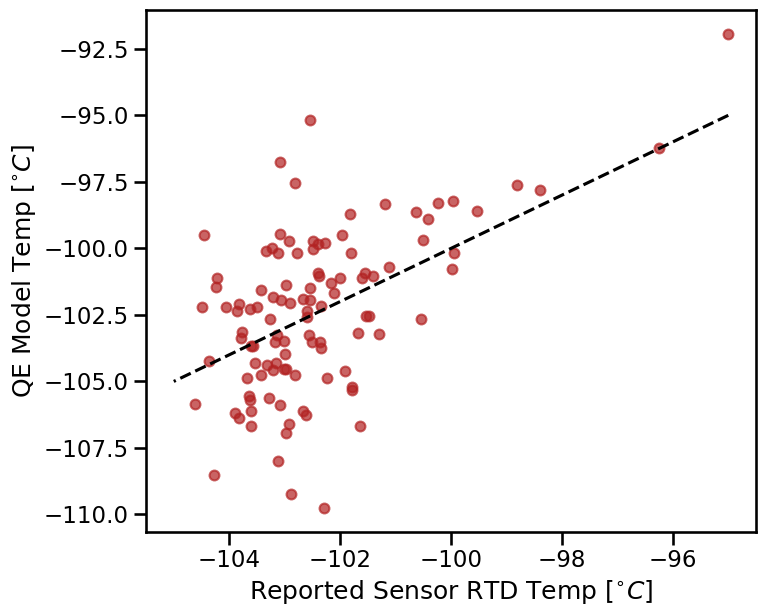

In [516]:
plt.figure(figsize=(8,6.5))

x = np.linspace(-95, -105, 100)
plt.plot(x, x, color='k', ls='--')
plt.scatter(rtd[flag], qe_temp[flag], color='firebrick', s=50, alpha=0.7)
# plt.scatter(rtd[flag], qe_temp[flag], c=df['Yccs'][flag], s=50, alpha=0.9, cmap='plasma')

plt.xlabel('Reported Sensor RTD Temp [$^{\circ}C$]')
plt.ylabel('QE Model Temp [$^{\circ}C$]')

plt.tight_layout()
plt.savefig('temp_calib.png', dpi=150)

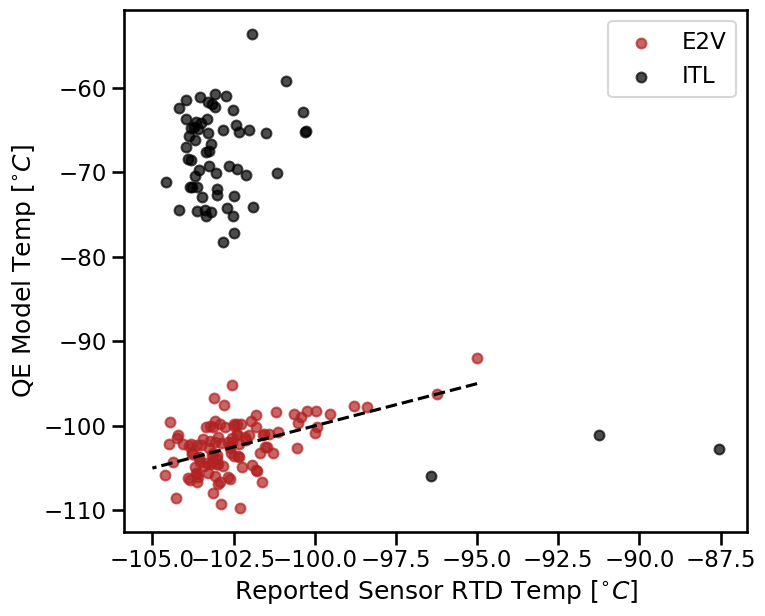

In [551]:
plt.figure(figsize=(8,6.5))

x = np.linspace(-95, -105, 100)
plt.plot(x, x, color='k', ls='--')
plt.scatter(rtd[flag], qe_temp[flag], color='firebrick', s=50, alpha=0.7,label='E2V')
plt.scatter(rtd[~flag], qe_temp[~flag], color='k', s=50, alpha=0.7, label='ITL')
# plt.scatter(rtd[flag], qe_temp[flag], c=df['Yccs'][flag], s=50, alpha=0.9, cmap='plasma')

plt.xlabel('Reported Sensor RTD Temp [$^{\circ}C$]')
plt.ylabel('QE Model Temp [$^{\circ}C$]')
plt.tight_layout()
plt.legend()
plt.savefig('temp_calib_itl.png', dpi=150)


<AxesSubplot:>

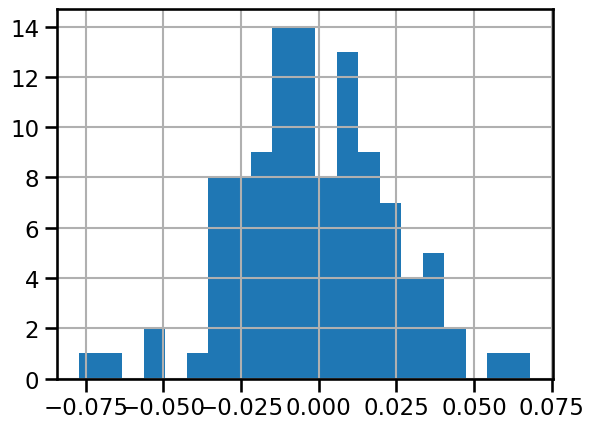

In [89]:
df.frac_res[flag].hist(bins=21)

### The QE zero point

According to the model the QE ratio zero point should be $ln(y_c)=-1.25$. But if we assume this value the temperature should be -22.5 colder. This is a very signficant offfset.

(array([ 2.,  2.,  8., 12., 23., 29., 20.,  8.,  2.,  2.]),
 array([-30.24754695, -28.76589068, -27.2842344 , -25.80257813,
        -24.32092185, -22.83926557, -21.3576093 , -19.87595302,
        -18.39429675, -16.91264047, -15.4309842 ]),
 <BarContainer object of 10 artists>)

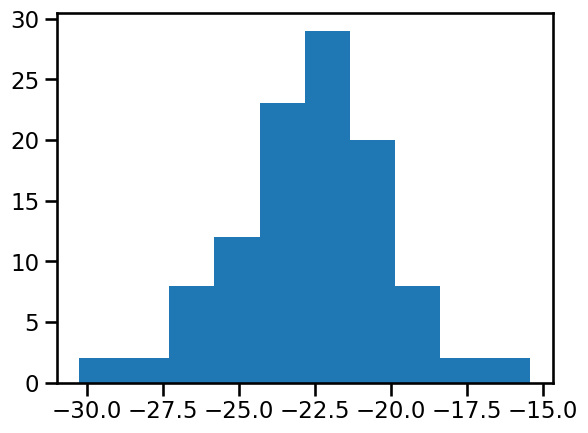

In [17]:
# if we assume the model
x = np.linspace(-10, -2000, 1000)
rtd = df['T(C)'].to_numpy()
flux = df[flux_col].to_numpy()

qe_temp2 = interp1d(linear2(x, *pars_model), x)(np.log(flux))

res2 = qe_temp2-rtd
frac_res2 = res2/qe_temp

plt.hist(res2[flag])

In [85]:
g.corr()['qe_temp']

Yccs             0.698925
Xccs            -0.235450
nm1020          -0.008310
nm1050           0.548650
nm1050/nm1020    0.999993
T(C)             0.461625
rms_T(C)         0.182723
E2V                   NaN
frac_res        -0.624647
qe_temp          1.000000
Name: qe_temp, dtype: float64

## Calibration Inside A Raft

In [432]:
df['frac_res'] = frac_res
df['qe_temp'] = qe_temp

# Group the DataFrame by 'Sensor'
grouped = df[flag].groupby('RXX')

# Calculate the sum of values for each sensor group
p1 = grouped['frac_res'].quantile(.16).values
p3 = grouped['frac_res'].quantile(.84).values
mean = grouped['frac_res'].median()

p1 = mean.values-p1
p3 = p3-mean.values
# print(mean_values)

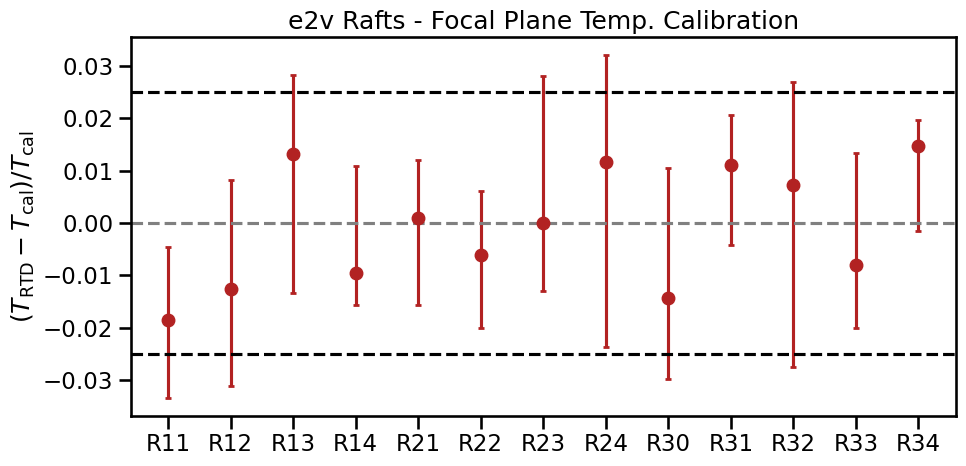

In [433]:
plt.figure(figsize=(10,5))
# plt.scatter(mean.index, mean.values, color='firebrick')
plt.errorbar(mean.index, mean.values, yerr=(p1,p3), fmt='o', capsize=2, capthick=2, color='firebrick')
plt.axhline(0., color='gray', ls='--')
plt.axhline(-0.025, color='k', ls='--')
plt.axhline(+0.025, color='k', ls='--')
# plt.ylim(-0.1,.1)
plt.title('e2v Rafts - Focal Plane Temp. Calibration')
plt.ylabel(r'$(T_{\rm RTD}-T_{\rm cal})/T_{\rm cal}$')
plt.tight_layout()
plt.savefig('qe_ratio_rtd_temp_raft.png', dpi=150)

In [434]:
def plot_temp_cal(df, col='qe_temp'):
    xm, ym = df.Xccs.mean(), df.Yccs.mean()
    rdis = [int(s[1]) for s in df.SXX]
    
    corr = df.corr()['qe_temp']['T(C)']
    x = np.linspace(-88, -105, 100)
    plt.plot(x, x, color='k', ls='--', label='Model slope=%.2e'%pars[0],lw=3)
    plt.scatter(df['T(C)'], df[col], color='firebrick', s=50, alpha=0.7, label=r'Corr($T_{RTD},T_{\rm cal})$=%.3f'%corr)
    #plt.scatter(df['T(C)'], df[col], c=rdis, s=100, label=r'Corr($T_{RTD},T_{\rm cal})$=%.3f'%corr, cmap='plasma')
    plt.xlabel('Reported Sensor RTD Temp [$^{\circ}C$]')
    plt.ylabel('QE Model Temp [$^{\circ}C$]')
    plt.legend(fontsize=12)
#     plt.colorbar(ticks=[0.,1.,2.]).set_label('REB Number')
    

In [514]:
len(e2vRaftList)

13

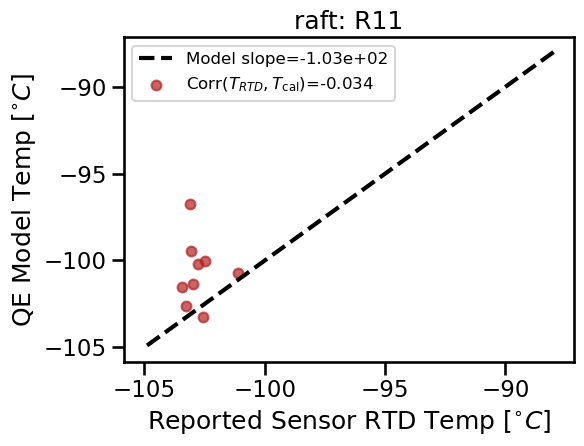

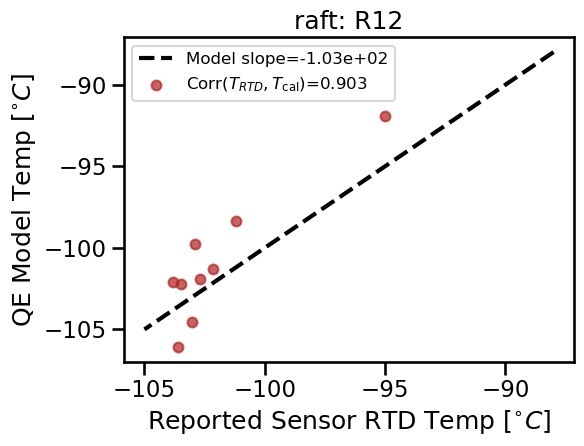

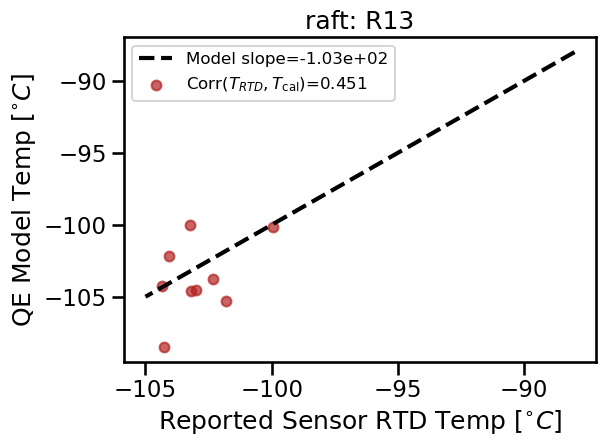

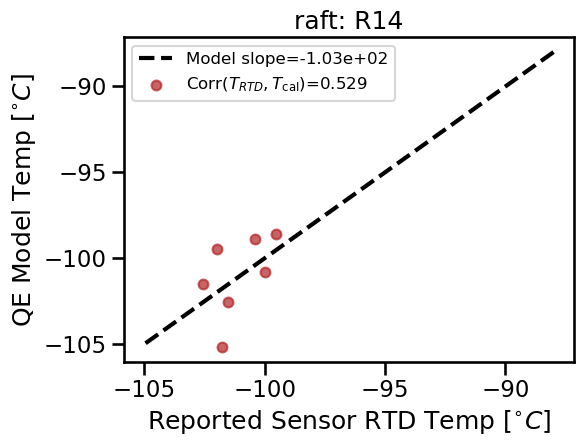

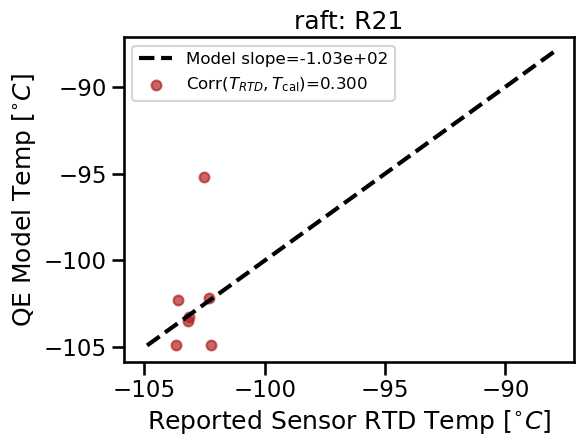

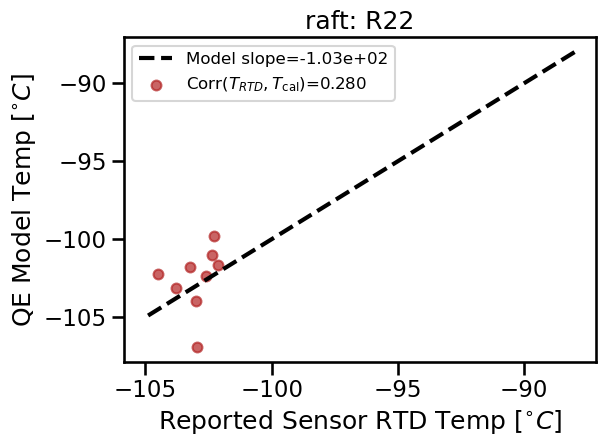

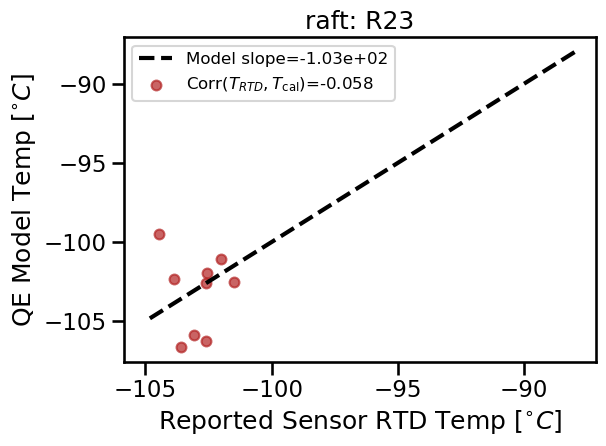

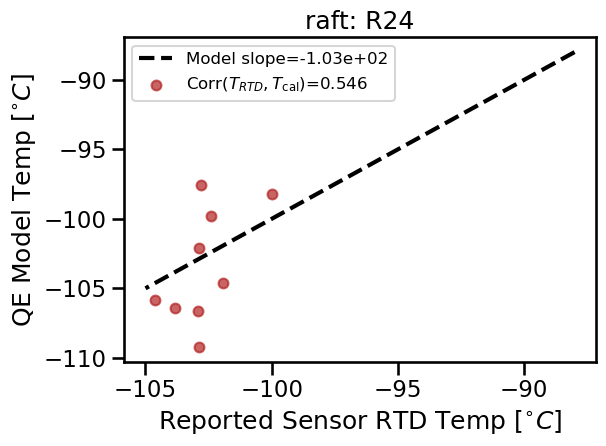

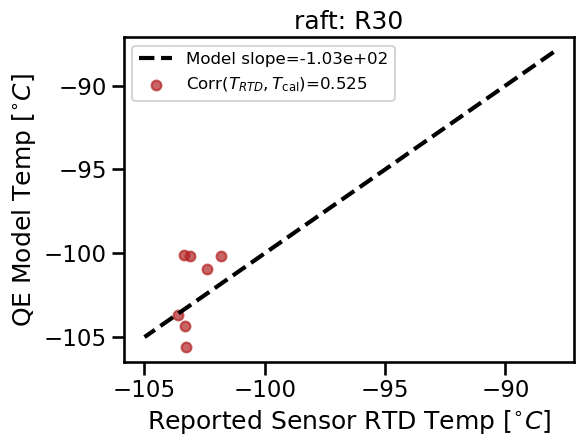

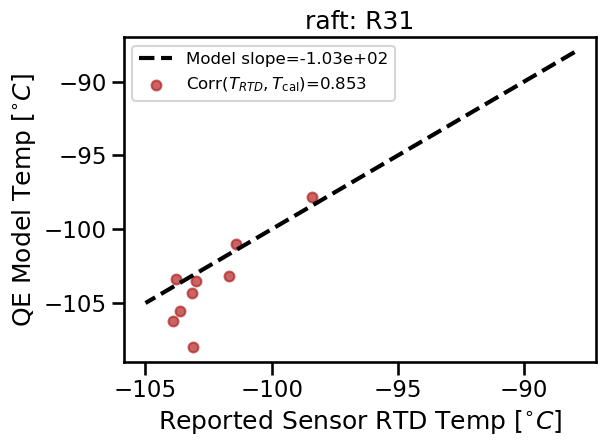

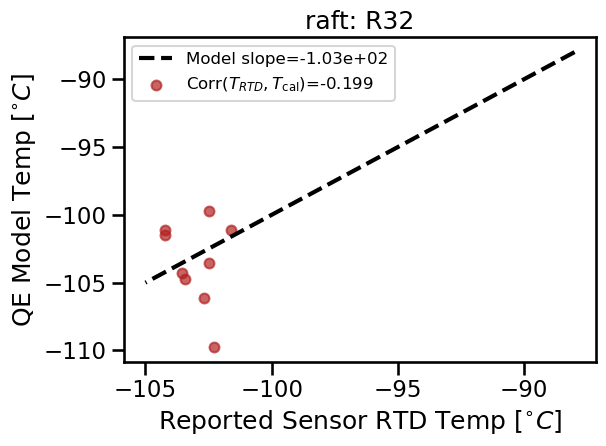

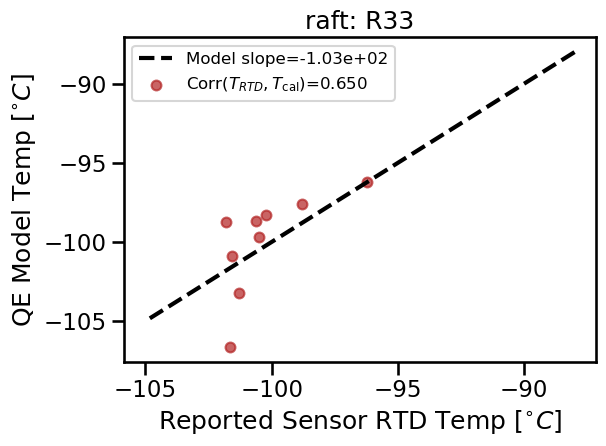

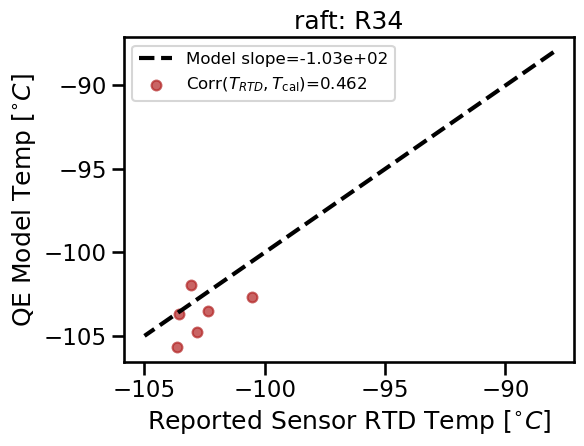

<Figure size 640x480 with 0 Axes>

In [515]:
plt.figure()
for raft in e2vRaftList:
    g = grouped.get_group(raft)
    plot_temp_cal(g)
    plt.title('raft: %s'%raft)
    plt.tight_layout()
    plt.savefig('temp_cal_%s.png'%raft)
    plt.figure()

In [428]:
# Group the DataFrame by 'Sensor'
grouped = df[e2vFlag].groupby('Reb')

# Calculate the sum of values for each sensor group
p1 = grouped['frac_res'].quantile(.25).values
p3 = grouped['frac_res'].quantile(.75).values
mean = grouped['frac_res'].median()

p1 = mean.values-p1
p3 = p3-mean.values
# print(mean_values)

group_names = list(grouped.groups.keys())
xl = [s.split('-')[0] for s in group_names]

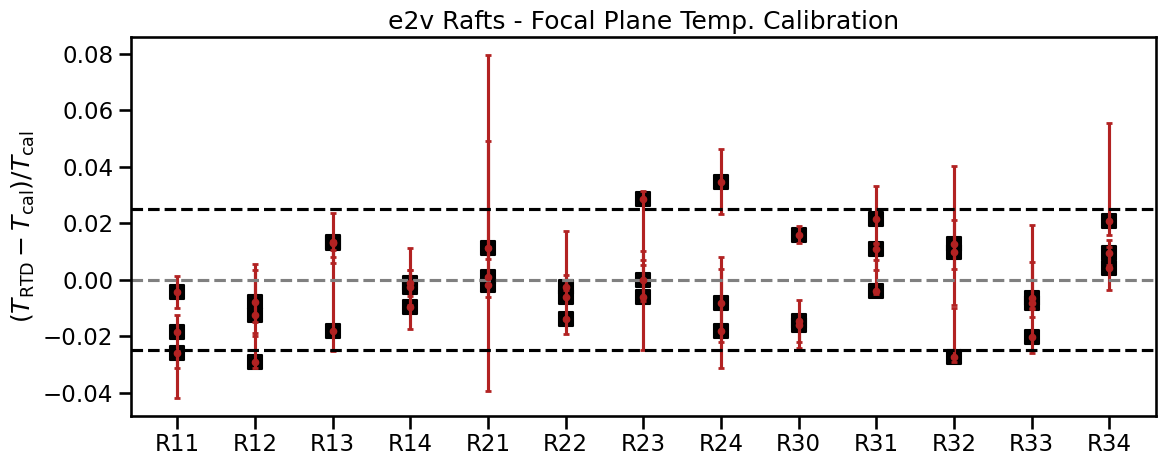

In [429]:
plt.figure(figsize=(12,5))
plt.errorbar(xl, mean.values, yerr=(p1,p3), fmt='.', ls=None, capsize=2, capthick=2, color='firebrick')
plt.scatter(xl, mean.values, color='k', s=100, marker='s')
plt.axhline(0., color='gray', ls='--')
plt.axhline(-0.025, color='k', ls='--')
plt.axhline(+0.025, color='k', ls='--')
# plt.ylim(-0.1,.1)
plt.title('e2v Rafts - Focal Plane Temp. Calibration')
plt.ylabel(r'$(T_{\rm RTD}-T_{\rm cal})/T_{\rm cal}$')
plt.tight_layout()
# plt.savefig('qe_ratio_rtd_temp_raft.png', dpi=150)

## Correlated Data

In [200]:
linear_fix = lambda x, b: x + b

coefs = []
for raft in e2vRaftList:
    g = grouped.get_group(raft)
    coefs.append(curve_fit(linear_fix, g['T(C)'],g['qe_temp']))
    
out = np.array([np.array([float(co[0]),float(co[1])]) for co in coefs]).T

<ErrorbarContainer object of 3 artists>

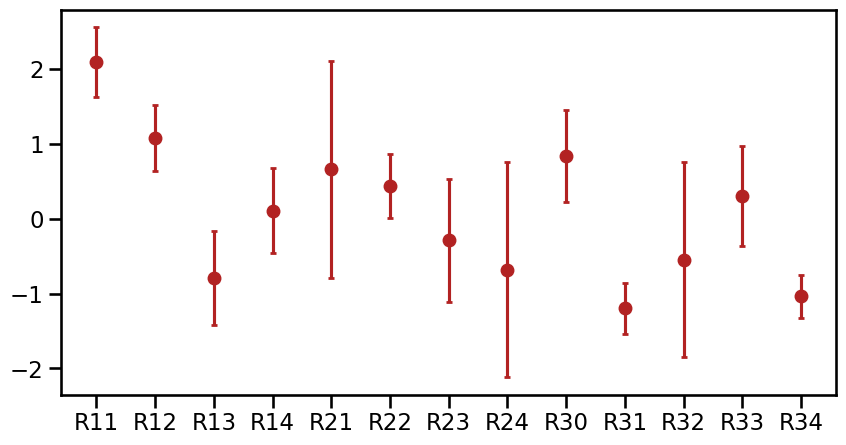

In [202]:
plt.figure(figsize=(10,5))
plt.errorbar(mean.index, out[0], yerr=out[1], fmt='o', capsize=2, capthick=2, color='firebrick')

## Spatial Variation

In [446]:
data = df
dflux = data['qe_temp']
data['xpeak'] = df['Yccs']
data['ypeak'] = df['Xccs']
itl = ~flag

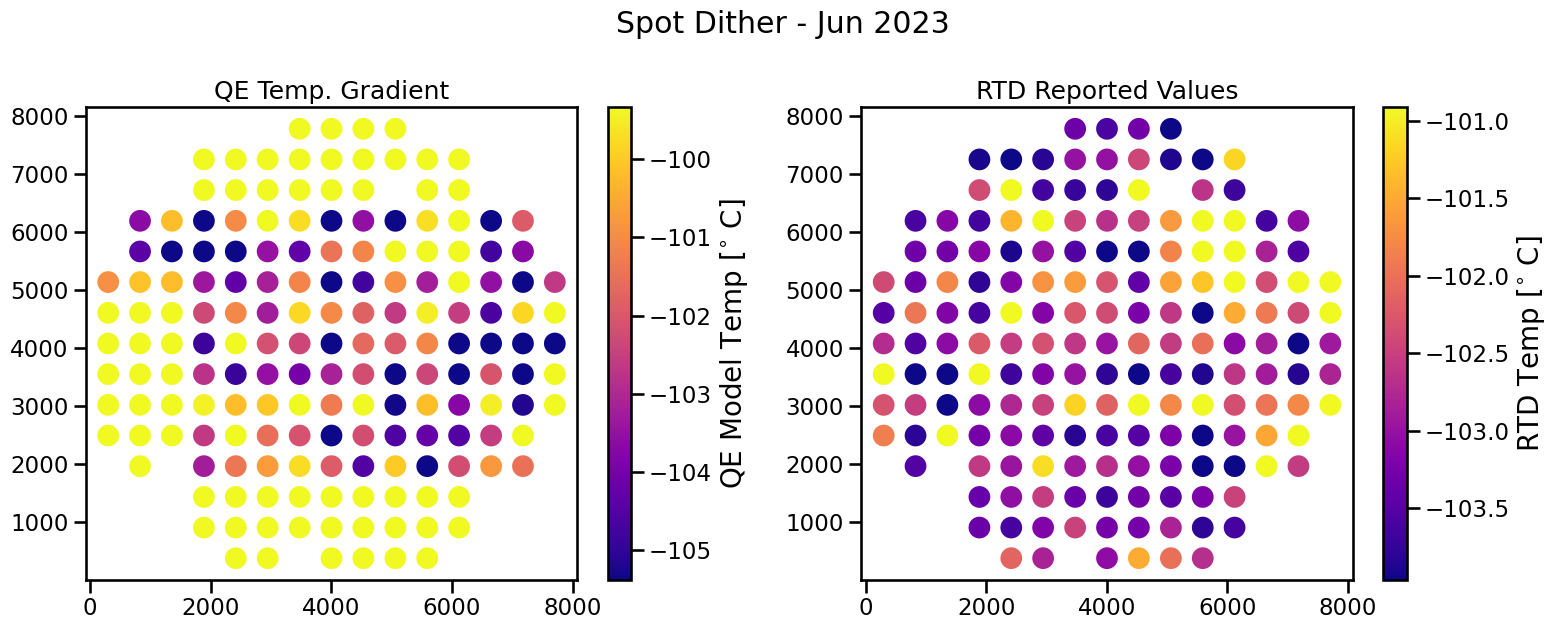

In [452]:
plt.figure(figsize=(16,6.5))
plt.subplot(1,2,1)
dflux = data['qe_temp']
fm = np.nanmean(dflux[~itl])
fms = np.nanstd(dflux[~itl])
plt.scatter(data['xpeak'],data['ypeak'],c=dflux,vmin=fm-fms,vmax=fm+fms,cmap='plasma',s=200)
plt.colorbar().set_label(r'QE Model Temp [$^{\circ}$ C]',fontsize=20)
plt.title('QE Temp. Gradient')

plt.subplot(1,2,2)
dflux = data['T(C)']
fm = np.nanmean(dflux[~itl])
fms = np.nanstd(dflux[~itl])
plt.scatter(data['xpeak'],data['ypeak'],c=dflux,vmin=fm-fms,vmax=fm+fms,cmap='plasma',s=200)
plt.colorbar().set_label(r'RTD Temp [$^{\circ}$ C]',fontsize=20)
plt.title('RTD Reported Values')


plt.suptitle(r'Spot Dither - Jun 2023')
plt.tight_layout()
plt.savefig(r'full_focal_plane_temp_comparasion.png',dpi=150)

In [456]:
from scipy.optimize import curve_fit

x,y = np.array(data['xpeak']), np.array(data['ypeak'])
funcPlane = lambda x,a,b,c: a+b*x[0]/8000. +c*x[1]/8000.
pars, pc = curve_fit(funcPlane, [x,y], dflux)
yp = funcPlane([x,y],*pars)
rms = np.std(yp-dflux)
rms

2.020523518743964

In [486]:
def plot_gradient(xs,ys,temps,ix=0,axs=None,label=''):
    if axs is None: axs = plt.gca()
    pars, pc = curve_fit(funcPlane, [xs,ys], temps)
    
    x = np.linspace(xs.min(),xs.max(),100)
    y = np.linspace(ys.min(),ys.max(),100)
    
    coord = [x,y]
    coords = [xs,ys]
    temp = funcPlane(coord, *pars)
    
    rms = np.std(funcPlane(coords, *pars)-temps)
    p = axs.plot(coord[ix], temp, lw=3, ls='--')
    axs.scatter(coords[ix], temps, alpha=0.75, label=label+'\n'+r'$ slope = %.3f$'%(pars[1+ix]),color=p[0].get_color())

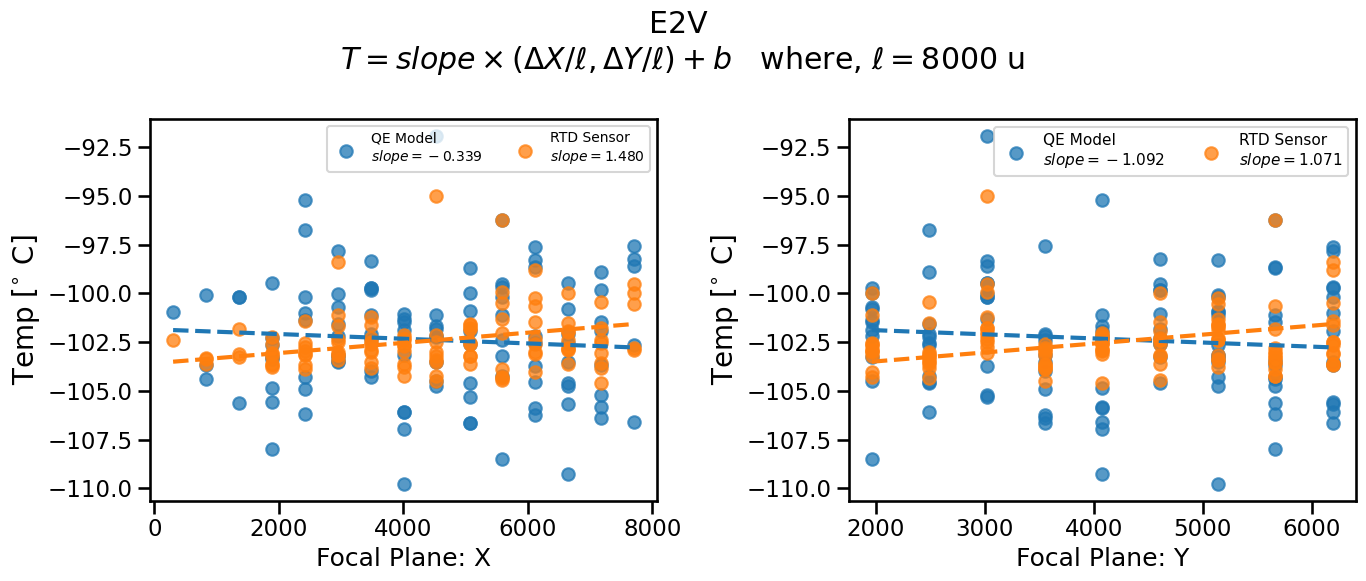

In [489]:
plt.figure(figsize=(14,6.))
plt.suptitle('E2V \n' + r'$ T = slope \times (\Delta X/ \ell, \Delta Y/ \ell )  + b$'+r'   where, $\ell = 8000$ u')

plt.subplot(1,2,1)
plot_gradient(data['xpeak'][~itl],data['ypeak'][~itl],data['qe_temp'][~itl],label='QE Model')
plot_gradient(data['xpeak'][~itl],data['ypeak'][~itl],data['T(C)'][~itl],label='RTD Sensor')
plt.legend(fontsize=10,ncol=2)
plt.xlabel('Focal Plane: X')
plt.ylabel(r'Temp [$^{\circ}$ C]',fontsize=20)

plt.subplot(1,2,2)
plot_gradient(data['xpeak'][~itl],data['ypeak'][~itl],data['qe_temp'][~itl],ix=1,label='QE Model')
plot_gradient(data['xpeak'][~itl],data['ypeak'][~itl],data['T(C)'][~itl],ix=1,label='RTD Sensor')

plt.legend(fontsize=11,ncol=2)
plt.xlabel('Focal Plane: Y')
plt.ylabel(r'Temp [$^{\circ}$ C]',fontsize=20)

plt.tight_layout()
plt.savefig(r'temp_variation_gradient.png',dpi=150)

In [320]:
linear_fix = lambda x, b: x + b

coefs = []
for raft in e2vRaftList:
    g = grouped.get_group(raft)
    coefs.append(curve_fit(linear_fix, g['T(C)'],g['qe_temp']))
    
out = np.array([np.array([float(co[0]),float(co[1])]) for co in coefs]).T


In [381]:
reb_group = df.iloc[flag].groupby('RebX')
group_names = list(reb_group.groups.keys())

out2 = []
for name in group_names:
    g = reb_group.get_group(name)
    #out2.append(np.polyfit(g['T(C)']-g['qe_temp'].mean(),g['qe_temp'],1))
    out2.append()
    
out2 = np.array(out2).T

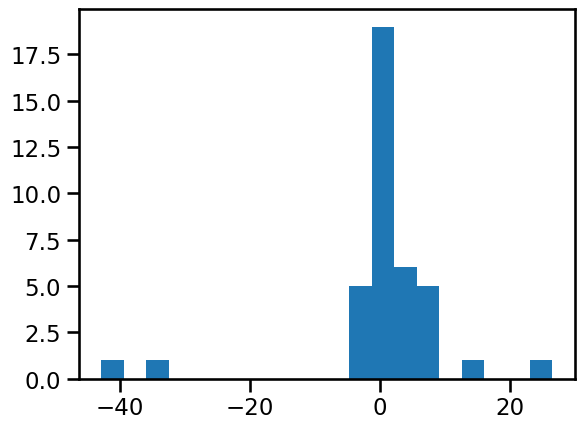

In [386]:
_ = plt.hist(out2[0], bins=20)

In [392]:
mask = np.array([ri in bad_rebs for ri in group_names])

In [394]:
out2[0][~mask]

array([ 0.73358301, 13.69393345, -1.01980627,  4.57209439, -3.28993215,
        1.21094273,  6.58813902,  1.81149095,  0.27056328,  3.27841112,
        1.45500688,  2.69722938,  5.87280523,  1.67137079, -2.08535177,
        4.47052283,  6.97653615, -1.2338015 ,  1.41690036, -0.13946953,
        7.39511881,  0.20233705,  1.1242681 ,  1.4509324 ,  1.37757655,
       26.42464062,  2.74390144,  0.47168346,  3.04005586,  0.46855494,
        6.65238176])

In [393]:
out2[0][mask]

array([ -0.22723783, -33.22550727,  -1.98406632,  -1.17418419,
        -1.08631935, -42.86043578,  -4.36091095,  -1.44778342])

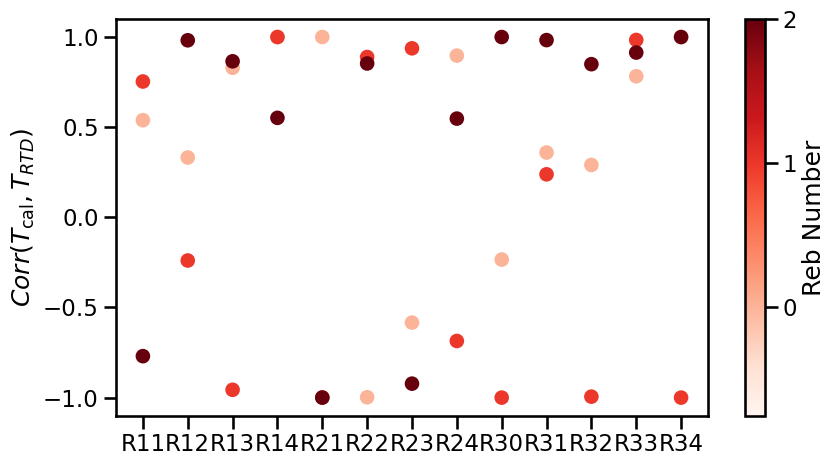

In [550]:
plt.figure(figsize=(9,5))
reb_group = df.iloc[flag].groupby('RebX')
bla = reb_group[['qe_temp','T(C)']].corr()['T(C)']
group_names = list(reb_group.groups.keys())
xl = [s.split('-')[0] for s in group_names]
color = np.tile(np.array([0,1,2]),np.unique(xl).size)
rebsCorr = bla[::2]
plt.scatter(xl, rebsCorr, c=color, cmap='Reds', vmin=-0.75)
plt.ylabel(r'$Corr(T_{\rm cal},T_{RTD})$')
plt.colorbar(ticks=[0., 1.0,2.0]).set_label('Reb Number')
plt.tight_layout()

(0.0, 17.0)

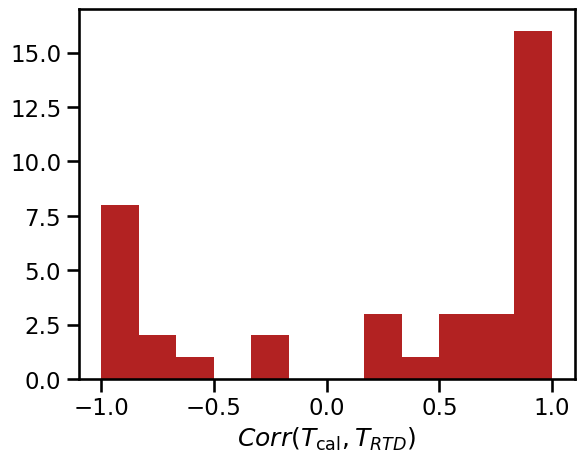

In [542]:
_ = plt.hist(rebsCorr, bins=12, color='firebrick')
plt.xlabel(r'$Corr(T_{\rm cal},T_{RTD})$')
plt.ylim(0.,17.)

array(['R11-2', 'R13-1', 'R21-1', 'R21-2', 'R22-0', 'R23-2', 'R30-1',
       'R32-1', 'R34-1'], dtype='<U5')

In [349]:
def plot_temp_cal2(df, col='qe_temp'):
    xm, ym = df.Xccs.mean(), df.Yccs.mean()
    rdis = [int(s[1]) for s in df.SXX]
    
    corr = df.corr()['qe_temp']['T(C)']
    x = np.linspace(-88, -105, 100)
    plt.plot(x, x, color='k', ls='--', label='Model slope=%.2e'%pars[0],lw=3)
    plt.scatter(df['T(C)'], df[col], color='firebrick', s=50, alpha=0.7, label=r'Corr($T_{RTD},T_{\rm cal})$=%.3f'%corr)
    plt.xlabel('Reported Sensor RTD Temp [$^{\circ}C$]')
    plt.ylabel('QE Model Temp [$^{\circ}C$]')
    plt.legend(fontsize=12)
    

In [371]:
good_rebs = np.array(group_names)[rebsCorr>-0.9]
bad_rebs = np.array(group_names)[rebsCorr<-0.9]

bad_rebs_mask = np.array([ri in good_rebs for ri in df['Reb']])
# bad_rebs_mask

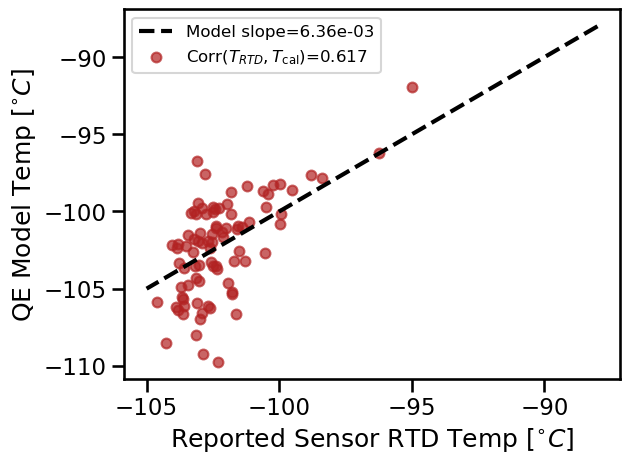

In [372]:
plot_temp_cal2(df.iloc[flag&bad_rebs_mask])

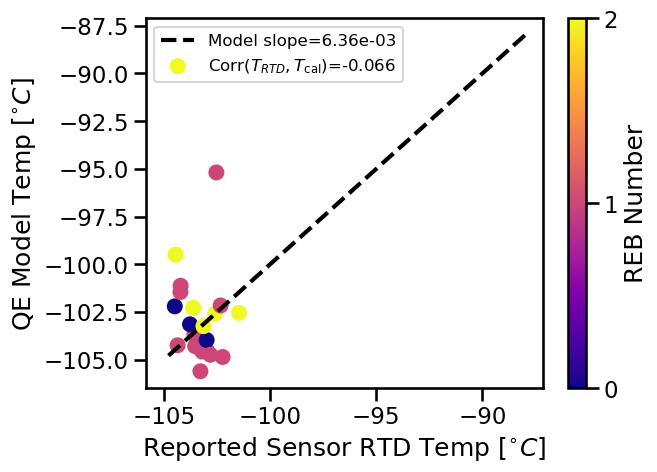

In [373]:
plot_temp_cal(df.iloc[flag&(~bad_rebs_mask)])

In [331]:
# plt.figure(figsize=(10,5))
# reb_group = df.iloc[flag].groupby('RebY')
# bla = reb_group[['qe_temp','T(C)']].corr()['T(C)']
# xl = [s.split('-')[0] for s in list(reb_group.groups.keys())]
# color = np.tile(np.array([1,2,3]),np.unique(xl).size)
# rebsCorr = bla[::2]
# plt.scatter(xl, rebsCorr, c=color, cmap='Accent')

In [332]:
rebsCorr

RebX          
R11-0  qe_temp    0.538723
R11-1  qe_temp    0.753318
R11-2  qe_temp   -0.770041
R12-0  qe_temp    0.331751
R12-1  qe_temp   -0.239585
R12-2  qe_temp    0.981936
R13-0  qe_temp    0.829671
R13-1  qe_temp   -0.956650
R13-2  qe_temp    0.865325
R14-0  qe_temp    1.000000
R14-1  qe_temp    1.000000
R14-2  qe_temp    0.551662
R21-0  qe_temp    1.000000
R21-1  qe_temp   -0.998848
R21-2  qe_temp   -1.000000
R22-0  qe_temp   -0.998051
R22-1  qe_temp    0.889173
R22-2  qe_temp    0.853347
R23-0  qe_temp   -0.583867
R23-1  qe_temp    0.937379
R23-2  qe_temp   -0.922584
R24-0  qe_temp    0.897023
R24-1  qe_temp   -0.685838
R24-2  qe_temp    0.547568
R30-0  qe_temp   -0.234333
R30-1  qe_temp   -1.000000
R30-2  qe_temp    1.000000
R31-0  qe_temp    0.359235
R31-1  qe_temp    0.238522
R31-2  qe_temp    0.983045
R32-0  qe_temp    0.290361
R32-1  qe_temp   -0.994655
R32-2  qe_temp    0.849472
R33-0  qe_temp    0.782351
R33-1  qe_temp    0.983748
R33-2  qe_temp    0.913827
R34-0  qe_tem

In [272]:
reb_group.groups.keys()

dict_keys(['R11-0', 'R11-1', 'R11-2', 'R12-0', 'R12-1', 'R12-2', 'R13-0', 'R13-1', 'R13-2', 'R14-0', 'R14-1', 'R14-2', 'R21-0', 'R21-1', 'R21-2', 'R22-0', 'R22-1', 'R22-2', 'R23-0', 'R23-1', 'R23-2', 'R24-0', 'R24-1', 'R24-2', 'R30-0', 'R30-1', 'R30-2', 'R31-0', 'R31-1', 'R31-2', 'R32-0', 'R32-1', 'R32-2', 'R33-0', 'R33-1', 'R33-2', 'R34-0', 'R34-1', 'R34-2'])

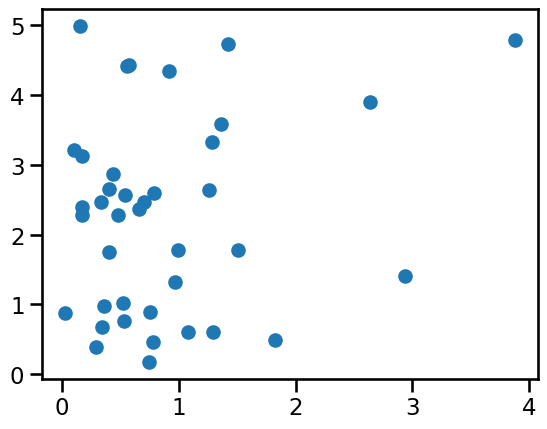

In [245]:
myslice = df.iloc[flag].groupby('Reb')[['qe_temp','T(C)']].std()
# plt.yscale('log')
plt.scatter(myslice['T(C)'],myslice['qe_temp'])

In [216]:
df.groupby('Reb').groups

{'R01-0': [54, 92], 'R01-1': [81, 107, 139], 'R01-2': [74, 110, 136], 'R02-0': [37, 157], 'R02-1': [20, 124, 128], 'R02-2': [12, 121, 130], 'R03-0': [13, 65], 'R03-1': [42, 98, 148], 'R03-2': [36, 95, 153], 'R10-0': [57], 'R10-1': [73, 111, 137], 'R10-2': [80, 108, 141], 'R11-0': [30, 89, 166], 'R11-1': [5, 78, 142], 'R11-2': [8, 76, 134], 'R12-0': [52, 96, 155], 'R12-1': [18, 62, 126], 'R12-2': [15, 66, 119], 'R13-0': [67, 122, 131], 'R13-1': [40, 47, 99], 'R13-2': [38, 50, 94], 'R14-0': [103, 150], 'R14-1': [16, 69], 'R14-2': [22, 63, 127], 'R20-0': [21, 64, 123], 'R20-1': [49, 97, 158], 'R20-2': [43, 102, 152], 'R21-0': [17, 117, 129], 'R21-1': [39, 44, 151], 'R21-2': [34, 48, 159], 'R22-0': [70, 114, 138], 'R22-1': [27, 60, 82], 'R22-2': [33, 56, 88], 'R23-0': [55, 86, 160], 'R23-1': [0, 77, 109], 'R23-2': [6, 71, 116], 'R24-0': [2, 106, 144], 'R24-1': [31, 53, 165], 'R24-2': [24, 59, 168], 'R30-0': [14, 118, 132], 'R30-1': [41, 149], 'R30-2': [35, 154], 'R31-0': [19, 61, 125], 'R3

In [201]:
curve_fit(linear_fix, df['T(C)'], df['qe_temp'])

(array([12.38987371]), array([[1.78462552]]))

In [149]:
grouped.get_group('R23').sort_values('T(C)')[['SXX','T(C)','qe_temp']]

,SXX,T(C),qe_temp
71,S21,-104.460,-99.495612
86,S01,-103.857,-102.369948
160,S00,-103.611,-106.656359
109,S12,-103.086,-105.903450
55,S02,-102.607,-106.245603
6,S20,-102.599,-102.595446
0,S10,-102.547,-101.946858
77,S11,-102.010,-101.095086
116,S22,-101.474,-102.546330


In [ ]:
df.sort_values

In [78]:
def plot_temp_color(df, col='nm1050/nm1020'):
    corr = df.corr()['qe_temp']['frac_res']
    x = np.linspace(-88, -105, 100)
    plt.plot(x, np.exp(linear2(x, *pars_model2)), color='k', ls='--', label='Model',lw=3)
    plt.scatter(df['T(C)'], df[col], color='firebrick', s=50, alpha=0.7, label='Corr($T_{RTD},T_{\rm cal})$=%.3f'%corr)
    plt.xlabel('Reported Sensor RTD Temp [$^{\circ}C$]')
    plt.ylabel('color')
    plt.legend(fontsize=12)

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
x = np.linspace(-88, -105, 100)
# plt.plot(x, np.exp(linear2(x, *pars)), color='k', ls='--',label='slope=%.2e'%pars[0])
plt.plot(x, np.exp(linear2(x, *pars_model2)), color='k', ls='--', label='Model slope=%.2e'%pars[0],lw=3)
plt.scatter(df['T(C)'][flag], df[flux_col][flag], color='firebrick', s=50, alpha=0.7)
plt.scatter(df['T(C)'].iloc[ix_out], df[flux_col].iloc[ix_out], color='k', marker='x', s=50, label='outliers: %s'%((', ').join(outline_sensors)))

plt.legend(fontsize=10, loc=0)
plt.yscale('log')
plt.xlabel('Reported Sensor RTD Temp [$^{\circ}C$]')
plt.ylabel('QE Ratio %s'%flux_col)

plt.subplot(1,2,2)
plt.scatter(rtd[flag], frac_res[flag], color='firebrick', s=50, alpha=0.7)
plt.axhline(-0.025, color='k', ls='--')
plt.axhline(+0.025, color='k', ls='--')
plt.ylabel(r'$(T_{\rm RTD}-T_{\rm cal})/T_{\rm cal}$')
plt.xlabel('Reported Sensor RTD Temp [$^{\circ}C$]')

plt.suptitle('e2v Rafts - Focal Plane Temp. Calibration')
plt.tight_layout()
plt.savefig('qe_ratio_rtd_temp_fit.png', dpi=150)

In [55]:
flux_col = 'nm1050'

In [56]:
coefs = {'nm1050':0.01694*1e6, 'nm1020': 0.01058*1e6}
a = coefs[flux_col]
linear = lambda x, b: a*x + b

In [57]:
from scipy.optimize import curve_fit

pars, pcov = curve_fit(linear, df['T(C)'][e2vFlag], df[flux_col][e2vFlag])
pars/1e6

array([4.03715848])

In [81]:
from scipy.interpolate import interp1d

x = np.linspace(-10, -200, 1000)
rtd = df['T(C)'][e2vFlag].to_numpy()
flux = df[flux_col][e2vFlag].to_numpy()

qe_temp = interp1d(np.log(linear(x, *pars)), x)(np.log(flux))

res = qe_temp-rtd
frac_res = res/qe_temp

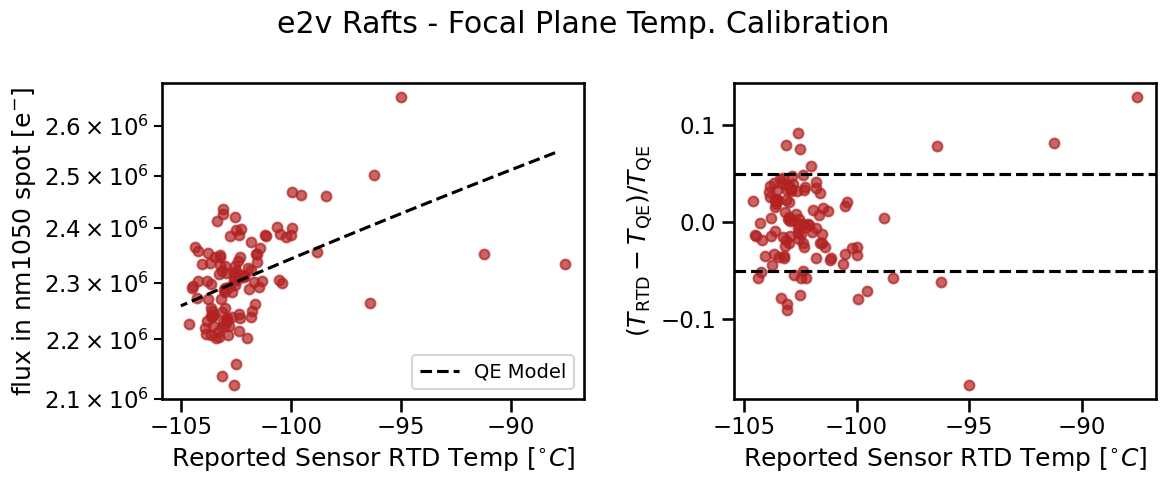

In [101]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
x = np.linspace(-88, -105, 100)
plt.plot(x, linear(x, *pars), color='k', ls='--',label='QE Model')
plt.scatter(df['T(C)'][e2vFlag], df[flux_col][e2vFlag], color='firebrick', s=50, alpha=0.7)

plt.legend(fontsize=14, loc=4)
plt.yscale('log')
plt.xlabel('Reported Sensor RTD Temp [$^{\circ}C$]')
plt.ylabel('flux in %s spot [e$^{-}$]'%flux_col)

plt.subplot(1,2,2)
plt.scatter(rtd, frac_res, color='firebrick', s=50, alpha=0.7)
plt.axhline(-0.05, color='k', ls='--')
plt.axhline(+0.05, color='k', ls='--')
plt.ylabel(r'$(T_{\rm RTD}-T_{\rm QE})/T_{\rm QE}$')
plt.xlabel('Reported Sensor RTD Temp [$^{\circ}C$]')

plt.suptitle('e2v Rafts - Focal Plane Temp. Calibration')
plt.tight_layout()

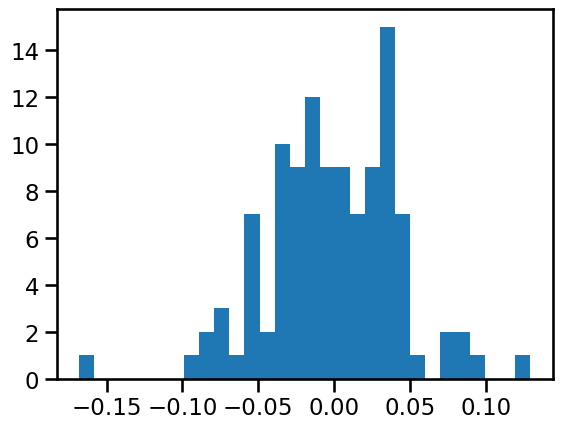

In [82]:
_ = plt.hist(frac_res, bins=30)

Text(0.5, 0, 'Reported Sensor RTD Temp [$^{\\circ}C$]')

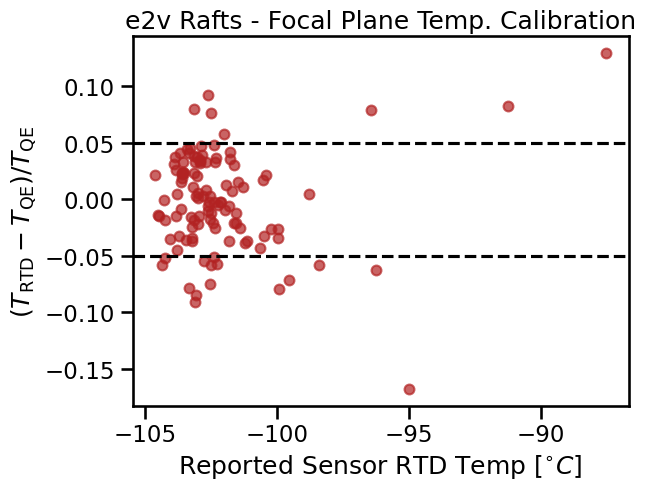

In [83]:
plt.scatter(rtd, frac_res, color='firebrick', s=50, alpha=0.7)
plt.axhline(-0.05, color='k', ls='--')
plt.axhline(+0.05, color='k', ls='--')
plt.title('e2v Rafts - Focal Plane Temp. Calibration')
plt.ylabel(r'$(T_{\rm RTD}-T_{\rm QE})/T_{\rm QE}$')
plt.xlabel('Reported Sensor RTD Temp [$^{\circ}C$]')

In [84]:
df['frac_res'] = np.nan
df['frac_res'][e2vFlag] = frac_res
# df['frac_res'][e2vFlag] = np.where(np.abs(frac_res)<0.1, frac_res, np.nan)

/var/folders/6w/mvq682kn30zd7qxmn0lmt4q00000gs/T/ipykernel_15896/1167986784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frac_res'][e2vFlag] = frac_res


In [95]:
outliers = df[np.abs(df['frac_res'])>0.08]
outliers

,sensor,Yccs,Xccs,nm1020,nm1050,nm1050/nm1020,T(C),rms_T(C),E2V,frac_res,SXX,RXX
5,R11_S11,2415.500,2492.500,9.507305e+06,2.435859e+06,0.256209,-103.091,0.46739,True,-0.090590,S11,R11
34,R21_S21,2415.500,4608.125,9.438930e+06,2.352982e+06,0.249285,-91.243,0.33921,True,0.082248,S21,R21
55,R23_S02,6118.625,3551.875,8.801926e+06,2.123109e+06,0.241210,-102.607,0.39980,True,0.091892,S02,R23
76,R11_S20,1887.375,3020.625,9.637310e+06,2.427342e+06,0.251869,-103.076,0.36985,True,-0.084663,S20,R11
117,R21_S00,1887.375,3551.875,9.466249e+06,2.334223e+06,0.246584,-87.554,0.41956,True,0.129054,S00,R21
119,R12_S22,4531.125,3020.625,1.006586e+07,2.659351e+06,0.264195,-95.000,0.40474,True,-0.168016,S22,R12


## Calibration Inside A Raft

In [71]:
# Group the DataFrame by 'Sensor'
grouped = df[e2vFlag].groupby('RXX')

# Calculate the sum of values for each sensor group
p1 = grouped['frac_res'].quantile(.16).values
p3 = grouped['frac_res'].quantile(.84).values
mean = grouped['frac_res'].median()

p1 = mean.values-p1
p3 = p3-mean.values
# print(mean_values)

Text(0, 0.5, '$(T_{\\rm RTD}-T_{\\rm QE})/T_{\\rm QE}$')

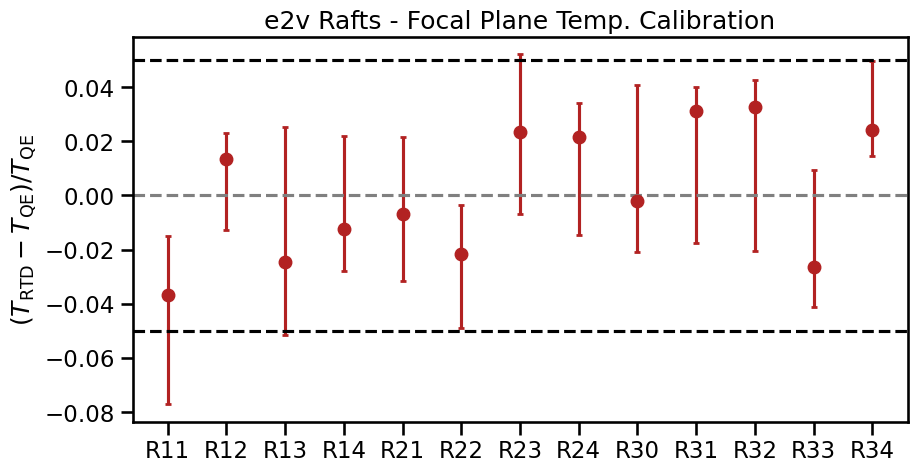

In [72]:
plt.figure(figsize=(10,5))
# plt.scatter(mean.index, mean.values, color='firebrick')
plt.errorbar(mean.index, mean.values, yerr=(p1,p3), fmt='o', capsize=2, capthick=2, color='firebrick')
plt.axhline(0., color='gray', ls='--')
plt.axhline(-0.05, color='k', ls='--')
plt.axhline(+0.05, color='k', ls='--')
# plt.ylim(-0.1,.1)
plt.title('e2v Rafts - Focal Plane Temp. Calibration')
plt.ylabel(r'$(T_{\rm RTD}-T_{\rm QE})/T_{\rm QE}$')



## Calibration Inside A Sensor

In [73]:
# Group the DataFrame by 'Sensor'
grouped = df[e2vFlag].groupby('SXX')

# Calculate the sum of values for each sensor group
p1 = grouped['frac_res'].quantile(.16).values
p3 = grouped['frac_res'].quantile(.84).values
mean = grouped['frac_res'].median()

p1 = mean.values-p1
p3 = p3-mean.values
# print(mean_values)

Text(0, 0.5, '$(T_{\\rm RTD}-T_{\\rm QE})/T_{\\rm QE}$')

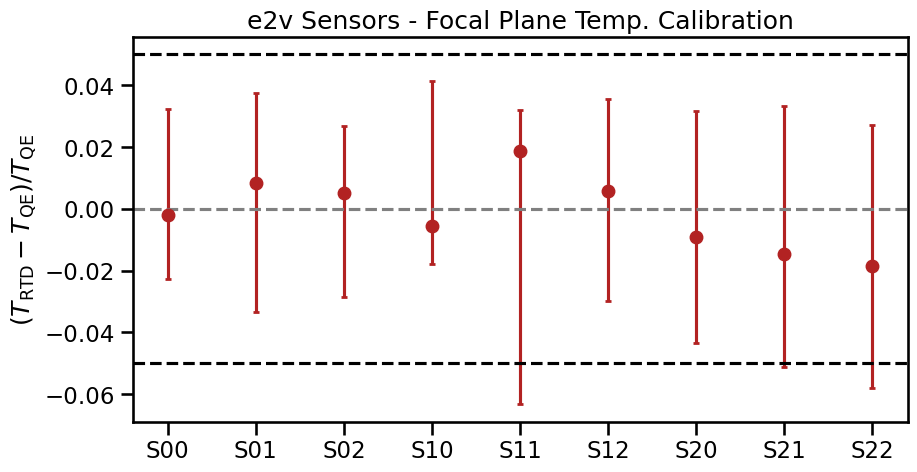

In [74]:
plt.figure(figsize=(10,5))
# plt.scatter(mean.index, mean.values, color='firebrick')
plt.errorbar(mean.index, mean.values, yerr=(p1,p3), fmt='o', capsize=2, capthick=2, color='firebrick')
plt.axhline(0., color='gray', ls='--')
plt.axhline(-0.05, color='k', ls='--')
plt.axhline(+0.05, color='k', ls='--')
# plt.ylim(-0.1,.1)
plt.title('e2v Sensors - Focal Plane Temp. Calibration')
plt.ylabel(r'$(T_{\rm RTD}-T_{\rm QE})/T_{\rm QE}$')



## QE Ratio

In [1]:
plt.scatter(df.Yccs, df.Xccs, c=df.frac_res, s='s', vmin=-0.05, vmax=0.05)
plt.colorbar()

NameError: name 'plt' is not defined

In [ ]:
df['sensor'] = df['channel'].apply(lambda x: x.split('/')[3])

In [90]:
datas2 = []
fnameBadRaft = path+'/ccsTemp/bad-sensors-%s.csv'
for raft in e2vRaftList:
    fname = fnameBadRaft%raft
    _df = pd.read_csv(fname)
    _df['sensor-only'] = _df['Sensor'].apply(lambda x: x.split('-')[1])
    datas2.append(_df)

df2 = pd.concat(datas2).reset_index()

In [97]:
df2[df2.Offset>4.]

,index,Raft,Sensor,Tmean,Tstd,Offset,sensor-only
1,0,R12,R12-S22,-102.883447,0.922887,7.813364,S22
8,0,R21,R21-S00,-102.964423,0.694578,15.424029,S00
9,1,R21,R21-S21,-102.964423,0.694578,11.714886,S21
19,0,R31,R31-S22,-102.969325,0.969114,4.549075,S22
24,0,R33,R33-S11,-101.229875,0.700684,4.818842,S11
26,0,R34,R34-S01,-102.658215,1.135164,6.218685,S01
